__Problem Statement:__ A large company named XYZ, employs, at any given point of time, around 4000 employees. However, every year, around 15% of its employees leave the company and need to be replaced with the talent pool available in the job market. The management believes that this level of attrition (employees leaving, either on their own or because they got fired) is bad for the company, because of the following reasons -

● A sizable department has to be maintained, for the purposes of recruiting new talent<br/>
● More often than not, the new employees have to be trained for the job and/or given time to
acclimatize themselves to the company<br/>
● Hence, the management has contracted an HR analytics firm to understand what factors they
should focus on, in order to curb attrition.<br/>
● In other words, they want to know what changes they should make to their workplace, in order to
get most of their employees to stay.<br/>
● Also, they want to know which of these variables is most important and needs to be addressed
right away.<br/>

Since you are one of the star analysts at the firm, this project has been given to you.

Goal of the case study You are required to model the probability of attrition. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

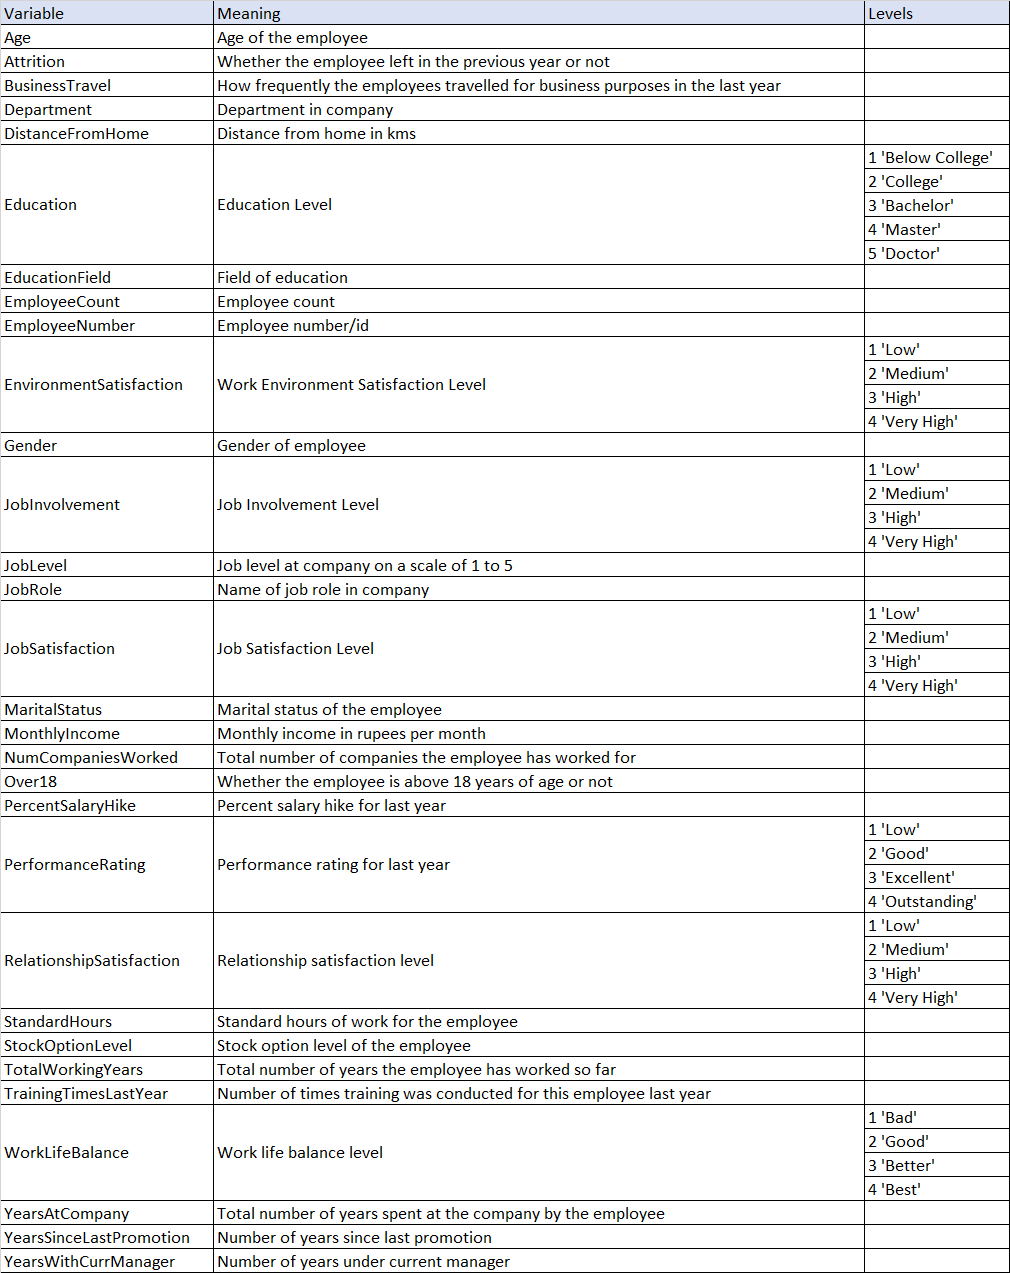

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#load data
data = pd.read_csv('general_data.csv')
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [2]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [3]:
data.dropna(inplace=True)

In [4]:
data.drop_duplicates(inplace=True)

In [10]:
data.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeCount', 'EmployeeID', 'Gender',
       'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'PercentSalaryHike', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

**Considering ___H0___ as for each of the column, there is ___no significant difference___ between the columns for ___attrition = yes___ and ___attirition = no___.
And ___Ha___ as for each of the column, there is ___significant difference___ between the columns for ___attrition = yes___ and ___attirition = no___.**

In [5]:
from scipy.stats import mannwhitneyu

In [7]:
Age_Yes = data[data.Attrition == 'Yes']['Age']
Age_No = data[data.Attrition == 'No']['Age']

stats, p = mannwhitneyu(Age_Yes, Age_No)
print(stats, p)

949178.0 7.98668614365882e-30


**Inference:** Since p = 7.98668614365882e-30 < 0.05, H0 is rejected and Ha is accepted. So there is significant difference between Age for Attrition = Yes and Age for Attrition = No.

In [18]:
DistanceFromHome_Yes = data[data.Attrition == 'Yes']['DistanceFromHome']
DistanceFromHome_No = data[data.Attrition == 'No']['DistanceFromHome']

stats, p = mannwhitneyu(DistanceFromHome_Yes, DistanceFromHome_No)
print(stats, p)

-0.009448638515156217 0.5317715668019558


**Inference:** Since p = 0.5317715668019558 > 0.05, H0 is accepted. So there is no significant difference between DistanceFromHome for Attrition = Yes and DistanceFromHome for Attrition = No.

In [8]:
MonthlyIncome_Yes = data[data.Attrition == 'Yes']['MonthlyIncome']
MonthlyIncome_No = data[data.Attrition == 'No']['MonthlyIncome']

stats, p = mannwhitneyu(MonthlyIncome_Yes, MonthlyIncome_No)
print(stats, p)

1249573.5 0.06508807631576838


**Inference:** **Inference:** Since p = 0.5317715668019558 > 0.05, H0 is accepted. So there is no significant difference between MonthlyIncome for Attrition = Yes and MonthlyIncome for Attrition = No.

In [9]:
NumCompaniesWorked_Yes = data[data.Attrition == 'Yes']['NumCompaniesWorked']
NumCompaniesWorked_No = data[data.Attrition == 'No']['NumCompaniesWorked']

stats, p = mannwhitneyu(NumCompaniesWorked_Yes, NumCompaniesWorked_No)
print(stats, p)

1238814.5 0.02793197853866981


**Inference:** Since p = 0.02793197853866981 < 0.05, H0 is rejected and Ha is accepted. So there is significant difference between NumCompaniesWorked for Attrition = Yes and NumCompaniesWorked for Attrition = No.

In [10]:
PercentSalaryHike_Yes = data[data.Attrition == 'Yes']['PercentSalaryHike']
PercentSalaryHike_No = data[data.Attrition == 'No']['PercentSalaryHike']

stats, p = mannwhitneyu(PercentSalaryHike_Yes, PercentSalaryHike_No)
print(stats, p)

1231873.5 0.017810794960084964


**Inference:** Since p = 0.017810794960084964 < 0.05, H0 is rejected and Ha is accepted. So there is significant difference between PercentSalaryHike for Attrition = Yes and PercentSalaryHike for Attrition = No.

In [11]:
TotalWorkingYears_Yes = data[data.Attrition == 'Yes']['TotalWorkingYears']
TotalWorkingYears_No = data[data.Attrition == 'No']['TotalWorkingYears']

stats, p = mannwhitneyu(TotalWorkingYears_Yes, TotalWorkingYears_No)
print(stats, p)

895173.5 2.741211827689903e-39


**Inference:** Since p = 2.741211827689903e-39 < 0.05, H0 is rejected and Ha is accepted. So there is significant difference between TotalWorkingYears for Attrition = Yes and TotalWorkingYears for Attrition = No.

In [12]:
TrainingTimesLastYear_Yes = data[data.Attrition == 'Yes']['TrainingTimesLastYear']
TrainingTimesLastYear_No = data[data.Attrition == 'No']['TrainingTimesLastYear']

stats, p = mannwhitneyu(TrainingTimesLastYear_Yes, TrainingTimesLastYear_No)
print(stats, p)

1225582.0 0.008107344081224082


**Inference:** Since p = 0.008107344081224082 < 0.05, H0 is rejected and Ha is accepted. So there is significant difference between TrainingTimesLastYear for Attrition = Yes and TrainingTimesLastYear for Attrition = No.

In [13]:
YearsAtCompany_Yes = data[data.Attrition == 'Yes']['YearsAtCompany']
YearsAtCompany_No = data[data.Attrition == 'No']['YearsAtCompany']

stats, p = mannwhitneyu(YearsAtCompany_Yes, YearsAtCompany_No)
print(stats, p)

912579.0 3.3433144809752036e-36


**Inference:** Since p = 3.3433144809752036e-36 < 0.05, H0 is rejected and Ha is accepted. So there is significant difference between YearsAtCompany for Attrition = Yes and YearsAtCompany for Attrition = No.

In [14]:
YearsSinceLastPromotion_Yes = data[data.Attrition == 'Yes']['YearsSinceLastPromotion']
YearsSinceLastPromotion_No = data[data.Attrition == 'No']['YearsSinceLastPromotion']

stats, p = mannwhitneyu(YearsSinceLastPromotion_Yes, YearsSinceLastPromotion_No)
print(stats, p)

1196606.0 0.00037904698157957496


**Inference:** Since p = 0.00037904698157957496 < 0.05, H0 is rejected and Ha is accepted. So there is significant difference between YearsSinceLastPromotion for Attrition = Yes and YearsSinceLastPromotion for Attrition = No.

In [15]:
YearsWithCurrManager_Yes = data[data.Attrition == 'Yes']['YearsWithCurrManager']
YearsWithCurrManager_No = data[data.Attrition == 'No']['YearsWithCurrManager']

stats, p = mannwhitneyu(YearsWithCurrManager_Yes, YearsWithCurrManager_No)
print(stats, p)

945958.5 5.420302388722274e-31


**Inference:** BSince p = 5.420302388722274e-31 < 0.05, H0 is rejected and Ha is accepted. So there is significant difference between YearsWithCurrManager for Attrition = Yes and YearsWithCurrManager for Attrition = No.